## Importing the  Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_theme(style="whitegrid")

##  Read The Dataset

In [2]:
app_df = pd.read_csv("..\\Dataset\\application_record.csv")
credit_df = pd.read_csv("..\\Dataset\\credit_record.csv")

# Show dataset info
print("Application Dataset:")
print(app_df.shape)
app_df.info()

print("\nCredit Record Dataset:")
print(credit_df.shape)
credit_df.info()

# Preview
print("\nApplication Dataset Preview:")
display(app_df.head())

print("\nCredit Record Dataset Preview:")
display(credit_df.head())


Application Dataset:
(438557, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-nu

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



Credit Record Dataset Preview:


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## Univariate Analysis

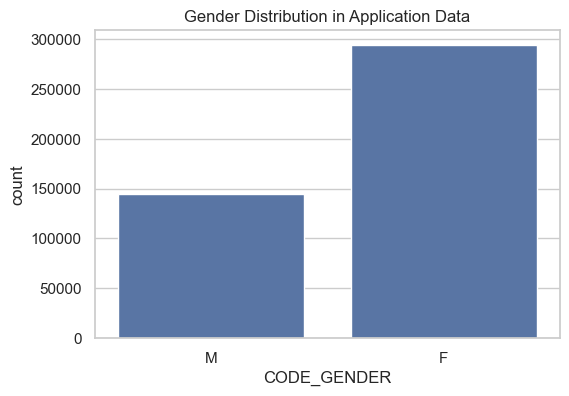

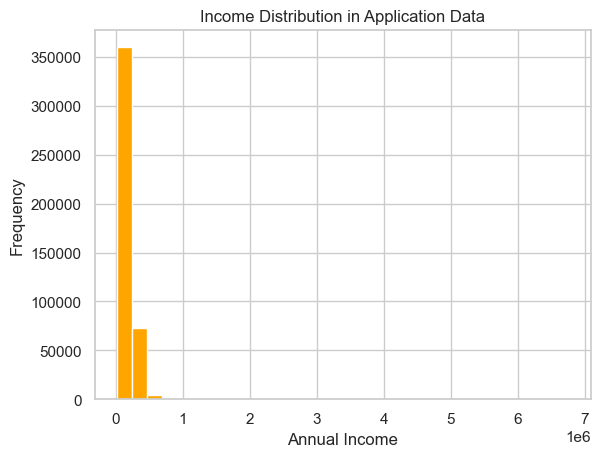

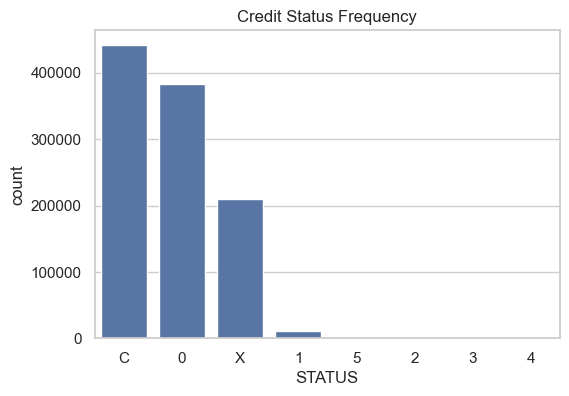

In [3]:
# Application dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=app_df, x='CODE_GENDER')
plt.title("Gender Distribution in Application Data")
plt.show()

plt.hist(app_df['AMT_INCOME_TOTAL'], bins=30, color='orange')
plt.title("Income Distribution in Application Data")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

# Credit dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=credit_df, x='STATUS', order=credit_df['STATUS'].value_counts().index)
plt.title("Credit Status Frequency")
plt.show()


## Multivariate Analysis

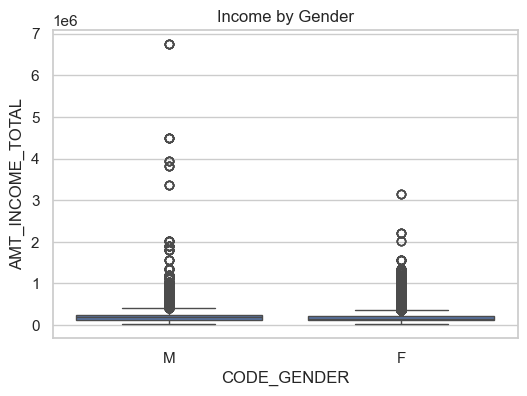

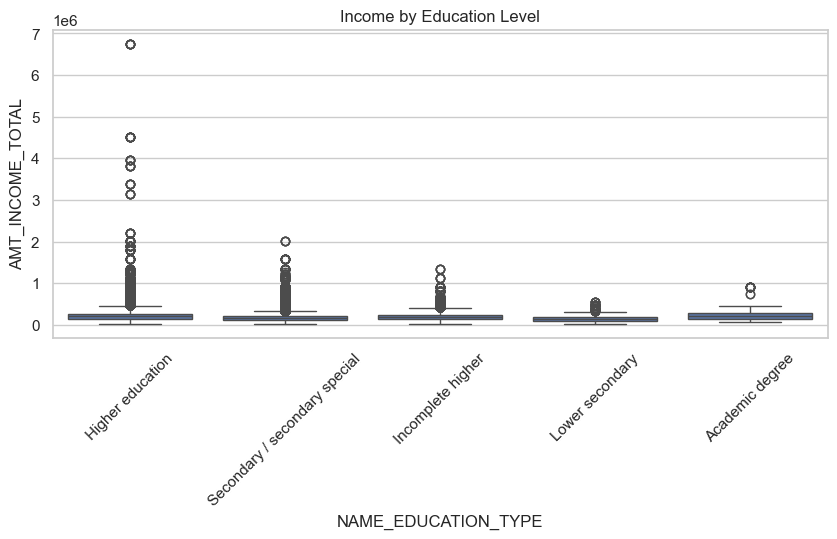

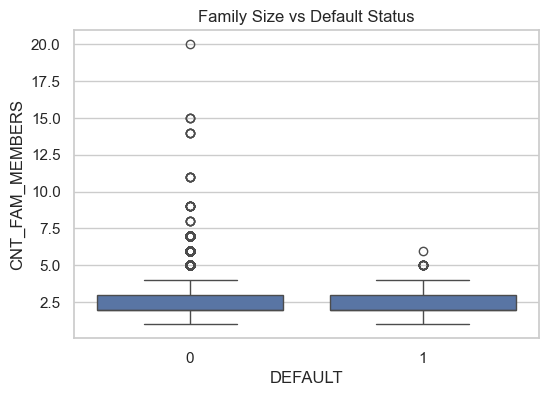

In [4]:
# Income by gender
plt.figure(figsize=(6, 4))
sns.boxplot(data=app_df, x='CODE_GENDER', y='AMT_INCOME_TOTAL')
plt.title("Income by Gender")
plt.show()

# Income by Education
plt.figure(figsize=(10, 4))
sns.boxplot(data=app_df, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL')
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

# Default label creation for multivariate analysis
defaulters = credit_df[credit_df['STATUS'].isin(['2', '3', '4', '5'])]['ID'].unique()
app_df['DEFAULT'] = app_df['ID'].apply(lambda x: 1 if x in defaulters else 0)

# Family Members vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(data=app_df, x='DEFAULT', y='CNT_FAM_MEMBERS')
plt.title("Family Size vs Default Status")
plt.show()



## Descriptive Analysis

In [5]:
# Application Data
print("Application Dataset Statistics:")
display(app_df.describe())

print("\nCategorical Column Distributions:")
for col in app_df.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:")
    print(app_df[col].value_counts())

# Credit Data
print("\nCredit Record Status Distribution:")
print(credit_df['STATUS'].value_counts())

print("\nMonths Balance Stats in Credit Record:")
print(credit_df['MONTHS_BALANCE'].describe())


Application Dataset Statistics:


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,DEFAULT
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465,0.001405
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207,0.037452
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000



Categorical Column Distributions:

CODE_GENDER value counts:
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64

FLAG_OWN_CAR value counts:
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64

FLAG_OWN_REALTY value counts:
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64

NAME_INCOME_TYPE value counts:
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64

NAME_EDUCATION_TYPE value counts:
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64

NAME_FAMILY_STATUS value counts:
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
